<a href="https://colab.research.google.com/github/TriNguyenTrong/exercise/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import thư viện**

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# **Tải dữ liệu từ drive**

In [ ]:
train_df = pd.read_csv('https://drive.google.com/uc?id=1I05vhrdgzVRRYUlbwe79JH9imZLhDbcs')
train_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


# **Tiền xử lý dữ liệu (xử lý các trường hợp thiếu dữ liệu, chuẩn hóa ngày tháng, đơn vị,...)**

Xóa các cột trùng lắp (nếu có)

In [ ]:
train_df.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


Tìm các giá trị null. Ở đây ta thấy cột ```Postal Code``` có 11 giá trị null

In [ ]:
train_df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Xóa null bằng cách ghi thêm giá trị

In [ ]:
train_df['Postal Code'] = train_df['Postal Code'].fillna('L7L 0A1')

Chuẩn hóa ngày tháng năm

In [ ]:
train_df['Order Date'] = pd.to_datetime(train_df['Order Date'],format='%d/%m/%Y')
train_df['Ship Date'] = pd.to_datetime(train_df['Ship Date'],format='%d/%m/%Y')

Ghi thêm dữ liệu tháng, năm, quý vào để dùng ở bên dưới

In [ ]:
train_df['month'] = train_df['Order Date'].dt.month
train_df['year'] = train_df['Order Date'].dt.year
train_df['quarter'] = train_df['Order Date'].dt.quarter

# **Vẽ biểu đồ thể hiện biến động doanh số theo tháng. Cho biết doanh thu trung bình trong 3 tháng gần nhất.**

## **Biểu đồ doanh số theo tháng**

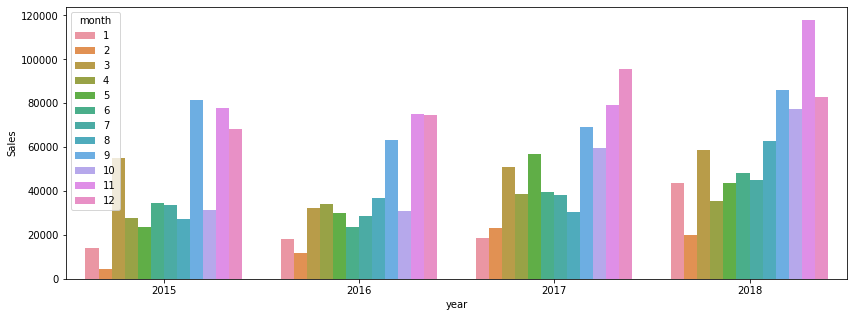

In [ ]:
chart_data1 = train_df.groupby(['year','month'])['Sales'].sum().reset_index()

fig, ax1 = plt.subplots(1, figsize=(14,5))


sns.barplot(x = 'year', y='Sales', hue='month', data=chart_data1, 
           ax=ax1, ci = None)

plt.show()

## **Trung bình doanh thu 3 tháng gần đây nhất**

In [ ]:
mean_3_month_most_recent = train_df.groupby(['year','month'])['Sales'].mean().reset_index().tail(3)
mean_3_month_most_recent['Sales'].mean()

234.3198052526079

# **Vẽ biểu đồ doanh số bán hàng theo quý và cho biết quý nào có tổng doanh số cao nhất?**

## **Biểu đồ doanh số bán hàng theo quý**

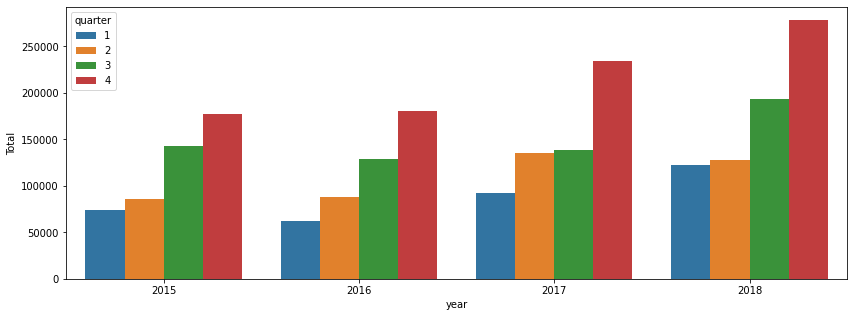

In [ ]:
chart_data = train_df.groupby(['year','quarter'])['Sales'].sum().reset_index(name='Total')
# chart_data
fig, ax1 = plt.subplots(1, figsize=(14,5))


sns.barplot(x = 'year', y='Total', hue='quarter',data=chart_data, 
           ax=ax1, ci = None)

plt.show()

## **Quý có doanh thu cao nhất**

Quý có doanh thu cao nhất là quý 4 năm 2018

In [ ]:
highest_total = chart_data.sort_values(['Total', 'year'], ascending=False).head(1)
highest_total

,year,quarter,Total
15,2018,4,278416.675


# **Tính thời gian trung giao hàng trung bình (ship date - order date) theo từng tháng và vẽ biểu đồ mô tả sự biến thiên của con số này.**

## **Thời gian trung giao hàng trung bình (ship date - order date) theo từng tháng**

In [ ]:
A = train_df
A['delivery_time'] = A['Ship Date'] - A['Order Date']
# A
data  = A.groupby(['year','month'])['delivery_time'].mean().reset_index(name='avg_delivery')
data


,year,month,avg_delivery
0,2015,1,4 days 04:40:31.168831168
1,2015,2,4 days 04:10:26.086956521
2,2015,3,3 days 23:03:53.766233766
3,2015,4,4 days 00:22:09.230769230
4,2015,5,3 days 19:14:22.809917355
5,2015,6,4 days 05:07:47.175572519
6,2015,7,3 days 20:16:54.084507042
7,2015,8,4 days 02:08:13.150684931
8,2015,9,4 days 01:20:53.932584269
9,2015,10,3 days 08:36:13.584905660


## **Biểu đồ mô tả sự biến thiên**

In [ ]:
fig = px.line(data, x='year', y="avg_delivery", 
             template = 'plotly_white', title = 'Total Sales by Product id', 
             width=800, height=450)

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    xaxis=dict(
    rangeselector=dict( buttons=list([ dict(count=1, label="1m", step="month", stepmode="backward"),
    dict(count=6,label="6m", step="month", stepmode="backward"),
    dict(count=1, label="YTD", step="year", stepmode="todate"),
    dict(count=1, label="1y", step="year", stepmode="backward"),
    dict(step="all")
            ]) 
                      ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

# **Vẽ biểu đồ thể hiện sức mua theo từng thành phố. Cho biết top 3 thành phố có doanh số thấp nhất và 3 thành phố có doanh số cao nhất.**

## **Biểu đồ sức mua theo từng thành phố**

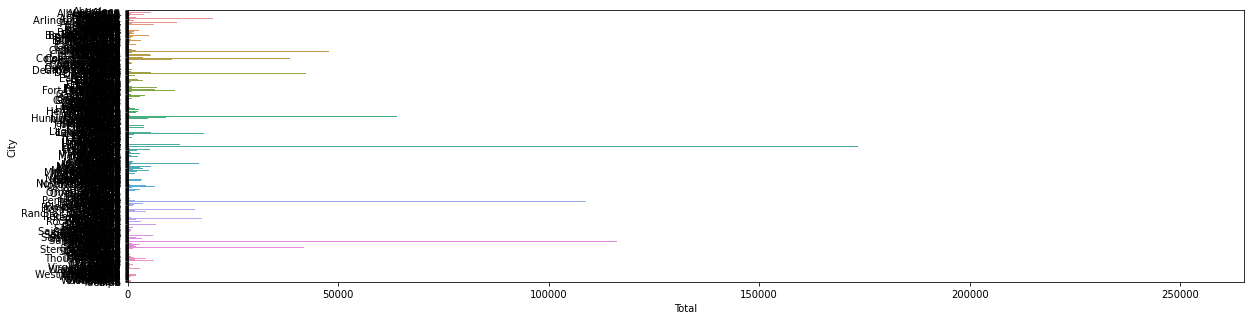

In [ ]:
purchasing_power = train_df.groupby(['City'])['Sales'].sum().reset_index(name='Total')

fig, ax1 = plt.subplots(1, figsize=(20,5))

# Xóa đoạn code trên và đổi sang 1 trong 2 đoạn code dưới sẽ nhìn rõ hơn, nhưng thời gian chạy sẽ khá lâu
# fig, ax1 = plt.subplots(1, figsize=(200,80))
# fig, ax1 = plt.subplots(1, figsize=(200,500))


sns.barplot(x = 'Total', y='City',data=purchasing_power, 
           ax=ax1, ci = None)

plt.show()

## **Top 3 thành phố có doanh số thấp nhất**

In [ ]:
top_3_low_total = train_df.groupby(['City'])['Sales'].sum().reset_index(name='Total').sort_values('Total').head(3)
top_3_low_total

,City,Total
1,Abilene,1.392
140,Elyria,1.824
221,Jupiter,2.064


# **Top 3 thành phố có doanh số cao nhất**

In [ ]:
top_3_high_total = train_df.groupby(['City'])['Sales'].sum().reset_index(name='Total').sort_values('Total', ascending=False).head(3)
top_3_high_total

,City,Total
327,New York City,252462.547
265,Los Angeles,173420.181
450,Seattle,116106.322


# **Vẽ biểu đồ thể hiện tỉ trọng doanh số theo bang (state) và cho biết trung bình doanh số của 5 bang dẫn đầu về sức mua.**

# **Biểu đồ tỉ trọng doanh số theo từng bang**

In [ ]:
df = train_df.groupby(['State']).sum().reset_index()

fig = px.pie(df, values='Sales', names='State')
fig.show()

## **Trung bình doanh số của 5 bang dẫn đầu về doanh số**

In [ ]:
# train_df.groupby(['year', 'quarter'])['Sales'].sum().reset_index().sort_values(['Sales', 'year'], ascending=False).head(1)

mean_5_state_top_revenue = train_df.groupby(['State'])['Sales'].mean().reset_index().sort_values('Sales').tail(5)
# mean_5_state_top_revenue
mean_5_state_top_revenue['Sales'].mean()

725.2035272727273

# **Các bang dẫn đầu doanh số theo từng vùng (east, west, south, central,..).**

In [ ]:
state_central_df = train_df[train_df['Region'] == 'Central'].groupby(['State','Region'])['Sales'].sum().reset_index(name='Total').sort_values('Total', ascending = False).head(1)
state_south_df = train_df[train_df['Region'] == 'South'].groupby(['State','Region'])['Sales'].sum().reset_index(name='Total').sort_values('Total', ascending = False).head(1)
west_south_df= train_df[train_df['Region'] == 'West'].groupby(['State','Region'])['Sales'].sum().reset_index(name='Total').sort_values('Total', ascending = False).head(1)
state_east_df=train_df[train_df['Region'] == 'East'].groupby(['State','Region'])['Sales'].sum().reset_index(name='Total').sort_values('Total', ascending = False).head(1)

In [ ]:
df_test = pd.DataFrame()
df_test['State'] = [state_central_df.iloc[0]['State'],state_south_df.iloc[0]['State'], west_south_df.iloc[0]['State'],state_east_df.iloc[0]['State']]
df_test['Region'] = [state_central_df.iloc[0]['Region'],state_south_df.iloc[0]['Region'], west_south_df.iloc[0]['Region'],state_east_df.iloc[0]['Region']]
df_test['Total'] =[state_central_df.iloc[0]['Total'],state_south_df.iloc[0]['Total'], west_south_df.iloc[0]['Total'],state_east_df.iloc[0]['Total']]

df_test.set_index('State')

,Region,Total
State,,
Texas,Central,168572.5322
Florida,South,88436.5320
California,West,446306.4635
New York,East,306361.1470


# **Cho biết top 3 sản phẩm có doanh thu cao nhất và top 3 sản phẩm có số lượng đơn vị bán ra cao nhất.**

## **Top 3 sản phẩm có doanh thu cao nhất**

In [ ]:
train_df.groupby(['Product Name'])['Sales'].sum().reset_index().sort_values('Sales', ascending = False).head(3)

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480


## **Top 3 sản phẩm có số lượng đơn vị bán ra cao nhất**

In [ ]:
train_df.groupby(['Product ID','Product Name'])['Product ID'].count().reset_index(name='count').sort_values('count', ascending = False).head(3)


,Product ID,Product Name,count
95,FUR-CH-10002647,"Situations Contoured Folding Chairs, 4/Set",15
1590,TEC-AC-10003628,Logitech 910-002974 M325 Wireless Mouse for We...,15
704,OFF-BI-10001524,GBC Premium Transparent Covers with Diagonal L...,14


# **Biểu đồ thể hiện tỉ trọng doanh số của từng category.**

In [ ]:
df = train_df.groupby(['Category'])['Sales'].sum().reset_index()

fig = px.pie(df, values='Sales', names='Category')
fig.show()

[link text](https://)